# Práctica 2 : Regresión Logística

Guillermo García Patiño Lenza y Mario Quiñones Pérez

In [1]:
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as opt

## Parte 1:

### Carga y visualización de los datos

In [2]:
def cargaDatos(fichero):
    datos = read_csv(fichero, header = None).to_numpy()
    return datos.astype(float)

In [3]:
def crearGrafica(datos, labels = ['y = 1', 'y = 0']):
    X = datos[:,:-1]
    Y = datos[:,-1]
    
    c1 = np.where(Y == 1)
    c2 = np.where(Y == 0)
    
    plt.scatter(X[c1,0], X[c1,1] , marker = '+', c = 'k', label = labels[0])
    plt.scatter(X[c2,0], X[c2,1], marker = 'o', c = 'y', label = labels[1])
    plt.legend(loc = 'upper right')
    plt.show()

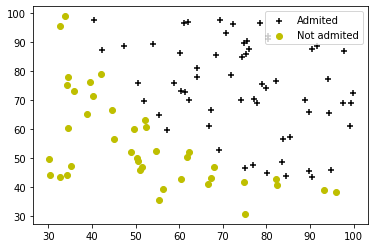

In [8]:
crearGrafica(cargaDatos("ex2data1.csv"), ['Admited', 'Not admited'])

### Funcion Sigmoide

In [4]:
def sigmoide(Z):
    sigmoide = 1 / (1 + np.exp(-Z))
    return sigmoide

### Cálculo de la función de coste y gradiente

In [5]:
def normalizar(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X-mu)/sigma
    return(X_norm, mu, sigma)

In [6]:
def coste(Theta, X, Y):
    G = sigmoide(np.dot(X, Theta))
    sum1 = np.dot(Y, np.log(G))
    sum2 = np.dot((1-Y), np.log(1 - G))
    return (-1 / X.shape[0]) * (sum1 + sum2)

In [7]:
def gradiente(Theta, X, Y):
    m = X.shape[0]
    G = sigmoide( np.matmul(X,Theta) )
    gradiente  = (1 / len(Y)) * np.matmul(X.T, G - Y)
    return gradiente

In [8]:
def prueba():
    datos = cargaDatos("ex2data1.csv")
    X = datos[:,:-1]
    Y = datos[:,-1]
    n = len(Y)
    
    X2,mu,sigma = normalizar(X)
    X2 = np.hstack([np.ones([n,1]), X2])
    
    c = coste(np.zeros(X2.shape[1]), X2, Y)
    gr = gradiente(np.zeros(X2.shape[1]),X2,Y)
    print(gr)
    print(c)

In [31]:
prueba()

[-0.1        -0.28122914 -0.25098615]
0.6931471805599452


### Cálculo del valor óptimo de los parámetros

In [9]:
def optimiza(datos = cargaDatos("ex2data1.csv")):
    X = datos[:,:-1]
    Y = datos[:,-1]
    m = X.shape[0]
    n = len(Y)
    
    X_n, mu, sigma = normalizar(X)
    
    X_n = np.hstack([np.ones([n,1]), X_n])
    T = np.zeros(X.shape[1]+1)

    result = opt.fmin_tnc(func = coste, x0 = T, fprime = gradiente, args = (X_n, Y))
    c_f = coste(result[0], X_n, Y )
    print(c_f)
    print(result[0])
    return result[0]

In [66]:
optimiza()


0.20349771564637412
[1.71787865 3.99150585 3.72363973]


array([1.71787865, 3.99150585, 3.72363973])

In [10]:
def crearGraficaConFrontera(datos, Theta, labels = ['y = 1', 'y = 0']):
    X = datos[:,:-1]
    Y = datos[:,-1]
    
    c1 = np.where(Y == 1)
    c2 = np.where(Y == 0)
    
    plt.scatter(X[c1,0], X[c1,1] , marker = '+', c = 'k', label = labels[0])
    plt.scatter(X[c2,0], X[c2,1], marker = 'o', c = 'y', label = labels[1])
    plt.legend(loc = 'upper right')
    
    
    

0.20349771564637412
[1.71787865 3.99150585 3.72363973]


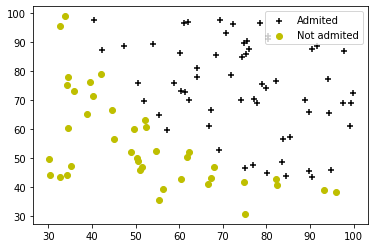

In [64]:
crearGraficaConFrontera(cargaDatos("ex2data1.csv"),optimiza(),['Admited', 'Not admited'])

In [11]:

# no entiendo por qué esto no va XDDDDDDDD

def pinta_frontera_recta(datos, theta):    
    
    X = datos[:,:-1]
    Y = datos[:,-1]
    
    plt.figure() 
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()    
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))   
    h = sigmoide(np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()].dot(theta))   
    h = h.reshape(xx1.shape)    
    # el cuarto parámetro es el valor de z cuya frontera se    
    # quiere pintar    
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')    
    plt.savefig("frontera.pdf")    
    plt.close()

In [63]:
pinta_frontera_recta(cargaDatos("ex2data1.csv"),optimiza())

0.20349771564637412
[1.71787865 3.99150585 3.72363973]


<ipython-input-62-2b9b0964198e>:14: UserWarning: No contour levels were found within the data range.
  plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')


### Evaluación de la regresión

In [12]:
def evalua(datos, parte_entrenamiento):
    f = round(len(datos) * parte_entrenamiento / 100)
    datos_ent = datos[:f]
    datos_eva = datos[f:]
    
    theta = optimiza(datos_ent)
    
    dat_ev_x = datos_eva[:,:-1]
    dat_ev_y = datos_eva[:,-1]
    
    dat_ev_x_n, mu, sigma = normalizar(dat_ev_x)
    dat_ev_x_n = np.hstack([np.ones([len(datos_eva),1]), dat_ev_x_n])
    
    res_eva = np.dot(dat_ev_x_n, theta)
    res_eva_m = [] 
    for e in map(lambda x : 1 if x >= 0.5 else 0, res_eva):
        res_eva_m.append(e)
        
    iguales = filter(lambda x : dat_ev_y[res_eva_m.index(x)] == x , res_eva_m)
    
    i = 0;
    for e in iguales:
        i = i+1
    
    print("Se ha predicho correctamente el resultado un {}% de las veces".format(i/len(datos_eva) * 100))
    
    return (i/len(datos_eva)*100)

In [121]:
evalua(cargaDatos("ex2data1.csv"), 75)

0.19456570964463282
[0.63167769 4.1627765  3.60606696]
Se ha predicho correctamente el resultado un 48.0% de las veces


48.0

## Parte 2:

### Carga y visualización de datos:

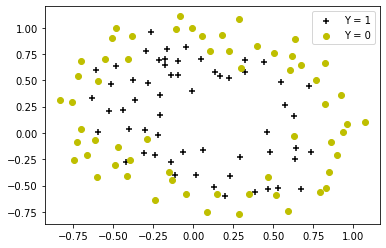

In [16]:
crearGrafica(cargaDatos("ex2data2.csv"), ['Y = 1', 'Y = 0'])

### Mapeo de los atributos:

In [22]:
from sklearn.preprocessing import PolynomialFeatures

def prepara_datos(datos, add):
    X = datos[:,:-1]
    Y = datos[:,-1]
    
    X_n, mu, sigma = normalizar(X)
    
    p = PolynomialFeatures(add)
    X2 = p.fit_transform(X_n)
    
    return (X2,Y,mu,sigma)

### Cálculo del coste y el gradiente regularizados

In [21]:
def coste_reg(Theta,X,Y, Lambda):
    c = coste(Theta,X,Y)
    m = X.shape[0]
    e = 0
    for t in range(1,len(Theta)):
        e += Theta[t]**2
    return c + (Lambda/(2*m))*e

In [30]:
def gradiente_reg(Theta,X,Y,Lambda):
    m = X.shape[0]
    gr = gradiente(Theta,X,Y)
    theta2 = (Lambda/m)*Theta
    return (gr + theta2)

In [31]:
def prueba2():
    X, Y, mu, sigma = prepara_datos(cargaDatos("ex2data2.csv"),6)
   
    Theta = np.zeros(X.shape[1])
    
    c = coste_reg(Theta,X,Y,1)
    gr = gradiente_reg(Theta,X,Y,1)
   
    print(gr)
    print(c)

In [32]:
prueba2()

[ 0.00847458  0.03705198 -0.00284799  0.19753354  0.03181133  0.14157707
  0.08474569 -0.02197759  0.01912472  0.01978675  0.60552761 -0.01178425
  0.17516318 -0.00748334  0.41389202  0.32662613 -0.08620202  0.03911234
 -0.02213139  0.05549666  0.01571     1.78985126 -0.11770386  0.34722535
 -0.07226827  0.2933989  -0.11751531  1.15773589]
0.6931471805599453


### Cálculo de los valores óptimos:

In [46]:
def preparaFunciones(Lambda):
    c = lambda Theta,X,Y : coste_reg(Theta,X,Y,Lambda)
    gr = lambda Theta,X,Y : gradiente_reg(Theta,X,Y,Lambda)
    
    return (c,gr)

In [54]:
def optimiza_reg(datos,Lambda):
    X, Y, mu, sigma = prepara_datos(datos,6)
    c, gr = preparaFunciones(Lambda)
    
    T = np.zeros(X.shape[1])

    result = opt.fmin_tnc(func = c, x0 = T, fprime = gr, args = (X, Y))
    c_f = coste(result[0], X, Y )
    print(c_f)
    print(result[0])
    return result[0]

In [55]:
optimiza_reg(cargaDatos("ex2data2.csv"),1)

0.3106301477647328
[ 1.78921858 -0.20464471  0.35721077  0.34155471 -0.36116351  0.2065437
  0.16059744  0.27913263  0.07042481 -0.30537586  0.31014869 -0.00627669
 -0.57550342 -0.51384431 -0.1917534  -0.05813961 -0.07166102  0.8255806
 -0.34799086 -0.44074034 -0.05058002 -0.4452219  -0.19915387 -0.46849091
  0.00975281 -0.87865853 -0.69286458 -0.33404499]


array([ 1.78921858, -0.20464471,  0.35721077,  0.34155471, -0.36116351,
        0.2065437 ,  0.16059744,  0.27913263,  0.07042481, -0.30537586,
        0.31014869, -0.00627669, -0.57550342, -0.51384431, -0.1917534 ,
       -0.05813961, -0.07166102,  0.8255806 , -0.34799086, -0.44074034,
       -0.05058002, -0.4452219 , -0.19915387, -0.46849091,  0.00975281,
       -0.87865853, -0.69286458, -0.33404499])

### Efectos de la regularizacion:

In [56]:
def evalua_reg(datos, parte_entrenamiento, Lambda):
    f = round(len(datos) * parte_entrenamiento / 100)
    datos_ent = datos[:f]
    datos_eva = datos[f:]
    
    theta = optimiza_reg(datos_ent,Lambda)
    
    dat_ev_x_n , dat_ev_y, mu, sigma = prepara_datos(datos_eva,6)
    
    res_eva = np.dot(dat_ev_x_n, theta)
    res_eva_m = [] 
    for e in map(lambda x : 1 if x >= 0.5 else 0, res_eva):
        res_eva_m.append(e)
        
    iguales = filter(lambda x : dat_ev_y[res_eva_m.index(x)] == x , res_eva_m)
    
    i = 0;
    for e in iguales:
        i = i+1
    
    return (i/len(datos_eva)*100)

In [61]:
def grafica_ev():
    datos = cargaDatos("ex2data2.csv")
    X = []
    Y = []
    for i in range(1,100):
        X.append(i)
        Y.append(evalua_reg(datos,75,i))
    
    plt.figure()
    plt.plot(X,Y)
    plt.show()

0.21960978182119342
[ 1.87874922 -0.15181875  0.1521222   0.94376843 -0.33020003  0.36245368
 -0.05447417  0.36221532 -0.11341318  0.11931271  0.69575438 -0.43885247
 -0.21249017 -0.40201139  0.04293085 -0.22241288 -0.09139792  0.46251552
  0.28854817 -0.39436122 -0.02531053 -0.60764891 -0.04282418 -0.48979541
 -0.27384176 -0.58890581 -0.47919412 -0.33260713]
0.242217815884977
[ 1.52908893 -0.12573512  0.09293406  0.74198707 -0.29716635  0.3818987
 -0.12128762  0.23577455 -0.0683789   0.09226047  0.46723687 -0.34608187
 -0.12162408 -0.33494841  0.10746412 -0.15283813 -0.02757504  0.32528888
  0.19657053 -0.31468654  0.00501762 -0.45892415 -0.01912767 -0.42788129
 -0.16885194 -0.41793788 -0.40017836 -0.32851593]
0.2588224677713932
[ 1.33129952 -0.11305837  0.0629785   0.65083014 -0.26961336  0.36786636
 -0.12960518  0.17456412 -0.06819386  0.08341506  0.37664869 -0.29517474
 -0.08877164 -0.30109671  0.12679515 -0.12367113 -0.00927702  0.24305683
  0.1553585  -0.27789146  0.02391092 -0.3

0.44611704861453416
[ 0.33034125 -0.06978952  0.02678162  0.17742794 -0.09674286  0.14636708
 -0.06476616  0.02414006 -0.04661669  0.02702949  0.10237426 -0.06687745
  0.011266   -0.10319302  0.06774051 -0.06512403  0.00668705 -0.00045427
  0.0235848  -0.10148813  0.04124143 -0.15256805  0.01193546 -0.09975745
 -0.01536728 -0.05633238 -0.12745476 -0.10456701]
0.4482086335702787
[ 0.32465806 -0.06913495  0.02645173  0.1743831  -0.09524906  0.14418662
 -0.06428966  0.02378783 -0.04626683  0.02680351  0.10034312 -0.06573534
  0.01135799 -0.1017251   0.06690325 -0.06478297  0.00684495 -0.00097695
  0.0233014  -0.10035495  0.04127484 -0.15101633  0.01168893 -0.09797001
 -0.01519227 -0.05487992 -0.12583484 -0.10317215]
0.4502511347287911
[ 0.31916224 -0.06848985  0.02613735  0.17143486 -0.0938034   0.14206515
 -0.0638141   0.02345007 -0.04591694  0.02659025  0.09837522 -0.0646351
  0.01143541 -0.10030268  0.06608098 -0.06446012  0.00699414 -0.0014676
  0.02302731 -0.09924079  0.04131715 -0.1

0.4886891385220561
[ 0.22520781 -0.05488956  0.01987508  0.1207809  -0.06817587  0.10476753
 -0.05765815  0.01798349 -0.03843251  0.02291538  0.05747946 -0.04617483
  0.01274045 -0.07544947  0.05580268 -0.05651289  0.01064592 -0.00841839
  0.01888636 -0.07820428  0.04183854 -0.12007305  0.00586424 -0.06686423
 -0.01344653 -0.03015272 -0.09733445 -0.08005024]
0.4898325845514664
[ 0.22261893 -0.05451313  0.01976509  0.11941489 -0.06746955  0.10364393
 -0.05719152  0.01784842 -0.03823468  0.02277889  0.05676317 -0.04563928
  0.01267686 -0.07472662  0.05517212 -0.05642117  0.01068965 -0.00859274
  0.01878592 -0.07767772  0.04184219 -0.11940876  0.00572433 -0.06600261
 -0.0133376  -0.02962349 -0.09648297 -0.07928733]
0.49095598075527247
[ 0.22009023 -0.05414455  0.0196575   0.11807962 -0.06677724  0.10254338
 -0.05673269  0.01771576 -0.03803885  0.02264714  0.056064   -0.04511642
  0.01261179 -0.07401699  0.05455122 -0.05633033  0.01073118 -0.00876159
  0.0186879  -0.07716077  0.04184412 -0

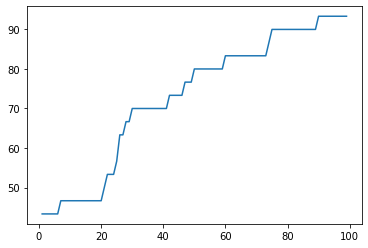

In [62]:
grafica_ev()